# Supervised Learning Lab Day 2

Adapt the code from the 'Day2-Block2-Notebook3' notebook to train a decision tree and a random forest classifier on the breast cancer data set from yesterday.

As well as training additional models, today you will invetigate the impact of changing model hyperparameters and how to perform ROC analysis using SKlearn

**Tasks (add your answers below each question):**

2.1 Using a 5-fold cross validation, train a decision tree and random forest classifier and report the model accuracy and sensitivity (see Notebook 3 for additional hints on how to do this)

2.2 How does the performance of these models compare to the Perceptron and Logistic regression? Is this what you would expect?

2.3 For the random forest model, try changing the n_estimators and max_features, one at a time. By training the model multiple times (using a FOR loop), plot the accuracy as you change these parameters.

2.4 If you have not already done so, complete 2.4 from yesterday 

In [1]:
# Data import for exercises
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('breast-cancer-wisconsin.csv', header = None, na_values='?')
y = data.iloc[:,10]
X = data.iloc[:,1:10]

In [2]:
y.unique

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: 10, Length: 699, dtype: int64>

In [3]:
# Models that will be used in this exercise
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Impute missing values. Note that this can be problematic, due to data leakage. Below, we show the more 'correct' way to impute the data.
# One alternative for imputation is to just remove the rows with missing data.
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X = imp_mean.transform(X)


In [5]:
# do cross-fold validation
from sklearn.model_selection import cross_validate
model = DecisionTreeClassifier()
scoring = {'acc':'accuracy', 'sens':'recall_macro'}
scores = cross_validate(model, X, y, cv=5, scoring = scoring, return_train_score = True) # this gives the accuracy

In [6]:
print(scores['test_acc'])

[0.89285714 0.92857143 0.95714286 0.95714286 0.94964029]


In [7]:
print(scores['test_sens'])

[0.86367754 0.94067029 0.95244565 0.95290424 0.92708333]


In [8]:
# do cross-fold validation for random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
model1 = RandomForestClassifier()
scores1 = cross_validate(model1, X, y, cv=5, scoring = scoring, return_train_score = True) # this gives the accuracy
print(scores1['test_acc'])
print(scores1['test_sens'])

# should see that random forest does a little bit better than a decision tree, logistic regression and perceptron

[0.93571429 0.93571429 0.97142857 0.97857143 0.98561151]
[0.92119565 0.94112319 0.9682971  0.96938776 0.98408883]


In [9]:
scores1['test_acc'].mean()

0.9614080164439877

In [10]:
# tinker with n_estimators
estimators = np.arange(1,20,1)

total_scores = [];
for i, est in enumerate(estimators):
    model1 = RandomForestClassifier(n_estimators = est)
    scores1 = cross_validate(model1, X, y, cv=5, scoring = scoring, return_train_score = True) # this gives the accuracy
    total_scores.append(scores1['test_acc'].mean())
print(total_scores)

[0.9298561151079137, 0.9213874614594039, 0.9485200411099692, 0.9470811921891059, 0.9614080164439877, 0.9571120246659814, 0.9471120246659815, 0.9527954779033916, 0.955693730729702, 0.9485097636176774, 0.9528365878725591, 0.9599691675231243, 0.9599897225077083, 0.9628263103802672, 0.9642548818088386, 0.9599897225077083, 0.9571120246659814, 0.9499794450154162, 0.9614080164439877]


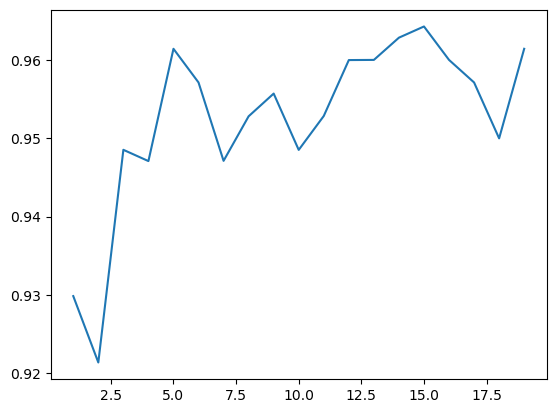

In [11]:
plt.plot(estimators, total_scores)

In [12]:
# tinker with max_features

n_features = np.arange(1,10,1) # try 1 to 10 features for each tree

total_scores = [];
for i, est in enumerate(n_features):
    model1 = RandomForestClassifier(max_features = est)
    scores1 = cross_validate(model1, X, y, cv=5, scoring = scoring, return_train_score = True) # this gives the accuracy
    total_scores.append(scores1['test_acc'].mean())
print(total_scores)

[0.9671223021582733, 0.9628365878725591, 0.9614080164439877, 0.9585508735868448, 0.9556731757451182, 0.9557040082219939, 0.9599794450154162, 0.9556834532374101, 0.9571120246659814]


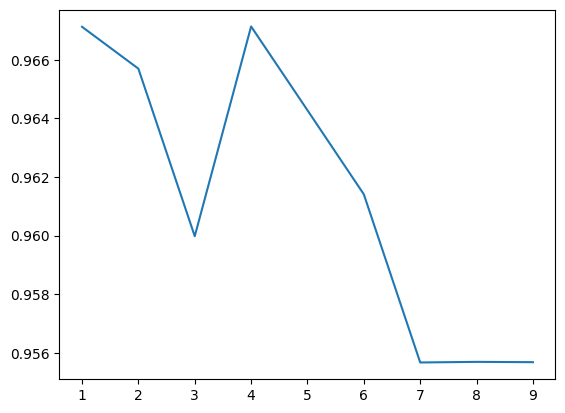

In [49]:
plt.plot(n_features, total_scores)

# my code

In [13]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import cross_validate

# Configure scoring
scoring = {'acc': 'accuracy', 'sens': 'recall_macro'}

# Train and evaluate Perceptron
perceptron_model = Perceptron()
perceptron_scores = cross_validate(perceptron_model, X, y, cv=5, scoring=scoring, return_train_score=True)

# Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000) # Increase max_iter if needed for convergence
logistic_scores = cross_validate(logistic_model, X, y, cv=5, scoring=scoring, return_train_score=True)

# Print results
print("Perceptron Accuracy:", perceptron_scores['test_acc'].mean())
print("Perceptron Sensitivity:", perceptron_scores['test_sens'].mean())

print("Logistic Regression Accuracy:", logistic_scores['test_acc'].mean())
print("Logistic Regression Sensitivity:", logistic_scores['test_sens'].mean())


Perceptron Accuracy: 0.9614080164439877
Perceptron Sensitivity: 0.9577298477919596
Logistic Regression Accuracy: 0.9628263103802672
Logistic Regression Sensitivity: 0.956878512274475
